## Classification

In [21]:
%config Completer.use_jedi = False

In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Solved By https://github.com/ageron/handson-ml/issues/143
* nil12285

In [3]:
mnist = fetch_mldata('MNIST original')
mnist

/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/sanghyub/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [38]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [39]:
y.shape

(70000,)

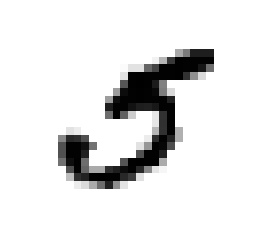

In [40]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [41]:
y[36000]

5.0

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [43]:
import numpy as np
shuffle_index = np.random.permutation(60000)

In [44]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [45]:
np.random.permutation(60000).shape

(60000,)

In [46]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [47]:
from sklearn.linear_model import SGDClassifier

sgd_clif = SGDClassifier(max_iter = 5, random_state = 33)
sgd_clif.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=33, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
sgd_clf.predict([some_digit])

array([ True])

In [49]:
sgd_clif.predict([some_digit])

array([ True])

## 성능 측정

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clif, X_train, y_train_5, cv=3, scoring = 'accuracy')

array([0.94325, 0.95135, 0.96835])

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring = 'accuracy')

array([0.96608616, 0.95516667, 0.96      , 0.95466667, 0.963997  ])

In [52]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [55]:
never_5_clf = Never5Classifier()

In [56]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9097 , 0.91045, 0.9088 ])

불균형한 데이터를 다룰때는 __Accuracy__를 성능 측정 지표로 사용하지 않는다.  
위의 예처럼, 5가 데이터의 10%미만인 훈련데이터에 대해서 무조건 5가 아니라고만 답해도 그 성능은 90% 이상이 나올 수 있기 때문이다.

##### Confusion Matrix(오차 행렬)
클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것

In [57]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clif, X_train, y_train_5, cv=3)

In [58]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54174,   405],
       [ 2225,  3196]])

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54269,   310],
       [ 2178,  3243]])

| TN | FP |  
| ---  
| FN | TP | 

310: 정답이 5가 아닌데 5라고 분류한 수, 2178:정답이 5인데 5가 아니라고 분류한 수  

In [59]:
#perfect
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

|   | Positive라고 예측 | Negative라고 예측  |   |   |  
|---|---|---|---|---|  
| __Positive__  | True Positive  | False Negative  |   |   |  
| __Negative__  | False Positive  | True Negative  |   |   |

#### 정밀도와 재현율

In [60]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.91274978891077962

In [61]:
recall_score(y_train_5, y_train_pred)

0.59822910902047588

In [64]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

In [65]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [66]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'recall')
    plt.xlabel('threshold')
    plt.legend(loc = 'lower right')
    plt.ylim([0, 1])

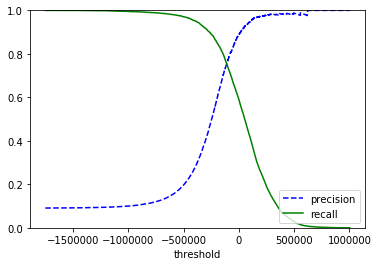

In [67]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds=thresholds)
plt.show()

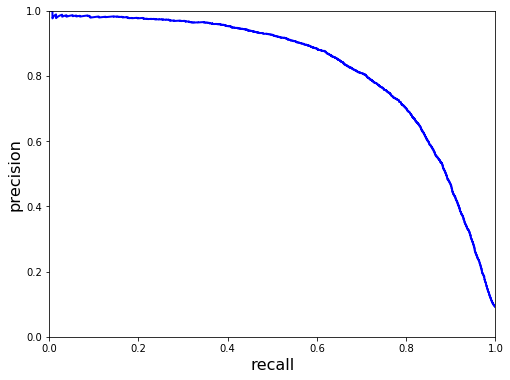

In [71]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

0.8정도에서 트레이드 오프로 삼는 것이 좋다

In [72]:
from sklearn.metrics import roc_curve

In [75]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

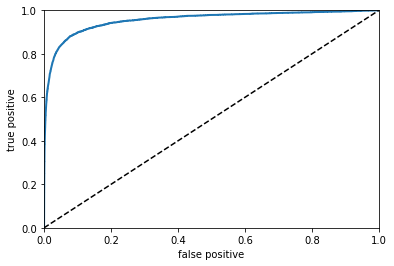

In [77]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive')
    plt.ylabel('true positive')
plot_roc_curve(fpr, tpr)
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score(y_train_5, y_scores) #곡선 아래의 면적

0.9556446188410336

양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 PR 곡선을 사용하고 그렇지 않으면 ROC커브를 사용한다.  